# Analysis and Visualization of Crime in London City

## Backgrounder

`Crime `is a significant social issue in many major cities around the world, including London City, the capital of England. Greater London is a densely populated metropolitan area, which includes various boroughs or administrative districts. Understanding crime trendf_lc in Greater London has important implications for security policies, law enforcement, and the quality of life of city residents.

In order to identify and address crime problems, crime data in London has been uploaded and shared with the public. This data includes information about the type of crime, the location of the crime, as well as the time and date the crime was reported. This data can provide valuable insights into crime patterns in the area.

## Dataset
Pada kasus ini akan dilakukan teknik visualisasi menggunakan dataset `London Crime Data` 2008-2016'

Sebelum mulai, download dataset dengan menjalankan cell berikut:

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url_london_crime = "../dataset/london_crime_by_lsoa.csv"
df_lc = pd.read_csv(
    url_london_crime
    # dtype={'month': str,
    # 'year': str})
)

In [4]:
df_lc.head(6)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5


In [5]:
df_lc.shape

(13490604, 7)

In [6]:
df_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [15]:
df_lc["borough"].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [16]:
df_lc["year"].unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009])

In [17]:
df_lc["major_category"].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [18]:
df_lc["minor_category"].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

In [19]:
df_lc["month"].unique()

array([11,  5,  3,  6,  7,  4,  9,  8, 12,  1, 10,  2])

## Crimes per Year

In [28]:
crimes_per_year = {}
for year in np.sort(df_lc['year'].unique()):
    crimes = df_lc.loc[df_lc['year'] == year]
    crimes_per_year[year] = sum(crimes['value'])
    
    
    

In [29]:
crimes.head(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3


In [46]:
crimes_per_year, crimes_per_month = {}, {}
months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
for year in np.sort(df_lc['year'].unique()):
    crimes_y = df_lc.loc[(df_lc['year'] == year)]
    crimes_per_year[year] = sum(crimes_y['value'])
    crimes_per_month[year] = []
    
    
    for month in months:
        crimes = crimes_y.loc[crimes_y['month'] == month]
        crimes_per_month[year].append(sum(crimes['value']))

sorted_vals = list(crimes_per_year.values())
sorted_vals.sort()


In [47]:
for year in ['2008', '2012', '2016']:
    crimes_y = df_lc.loc[(df_lc['year'] == year)]
    crimes_per_month[year] = []
    
    for month in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']:
        crimes = crimes_y.loc[crimes_y['month'] == month]
        crimes_per_month[year].append(sum(crimes['value']))

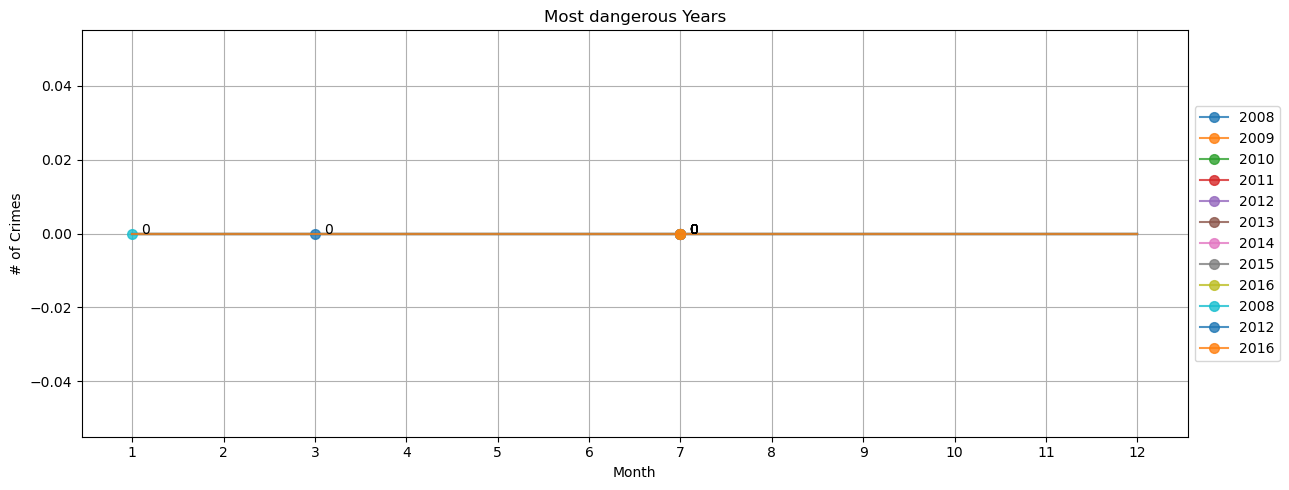

In [49]:
plt.figure(figsize=(13, 5))

xy = None

for year in crimes_per_month.keys():    
    if year == '2008':
        xy = (0.1, max(crimes_per_month[year]))
        markevery = [0]
    elif year == '2012':
        xy = (2.1, max(crimes_per_month[year]))
        markevery = [2]
    else:
        xy = (6.1, max(crimes_per_month[year]))
        markevery = [6]
        
    plt.plot(range(len(crimes_per_month[year])), crimes_per_month[year], 
             label=year, alpha=.8, marker='o', markersize=7.0,
             markevery=markevery)
    plt.annotate(max(crimes_per_month[year]), xy)

plt.xticks(range(len(df_lc['month'].unique())), 
           ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.xlabel('Month')
plt.ylabel('# of Crimes')
plt.title('Most dangerous Years')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()